In [1]:
# 필요한 패키지 설치

!pip install tensorflow
import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, LSTM
from keras.layers.convolutional import Convolution2D, MaxPooling2D
import sys
from sklearn.preprocessing import MinMaxScaler
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# CNN 모델 생성

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#데이터를 10,000개로 제한
(x_train, y_train), (x_test, y_test) = (x_train[:10000], y_train[:10000]
                                       ), (x_test[:10000], y_test[:10000])

input_shape = (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 데이터 정규화
x_train = x_train.astype('float') / 255.
x_test = x_test.astype('float') / 255.

# 학습셋, 테스트셋 형태 출력
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# 학습셋, 테스트셋 범주 10 설정
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# CNN 모델 구축 -은닉층 생성
model = Sequential()
model.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(64, (2, 2), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# CNN 컴파일
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', metrics=['accuracy'])

model.summary()

x_train shape: (10000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         

Epoch 1/5
264/264 [==============================] - 11s 39ms/step - loss: 0.0866 - accuracy: 0.8579 - val_loss: 0.0323 - val_accuracy: 0.9508
Epoch 2/5
264/264 [==============================] - 11s 42ms/step - loss: 0.0279 - accuracy: 0.9598 - val_loss: 0.0165 - val_accuracy: 0.9765
Epoch 3/5
264/264 [==============================] - 11s 42ms/step - loss: 0.0194 - accuracy: 0.9729 - val_loss: 0.0172 - val_accuracy: 0.9741
Epoch 4/5
264/264 [==============================] - 11s 40ms/step - loss: 0.0153 - accuracy: 0.9782 - val_loss: 0.0145 - val_accuracy: 0.9789
Epoch 5/5
264/264 [==============================] - 10s 39ms/step - loss: 0.0132 - accuracy: 0.9821 - val_loss: 0.0116 - val_accuracy: 0.9814
Test accuracy: 0.9814000129699707
313/313 [==============================] - 2s 5ms/step


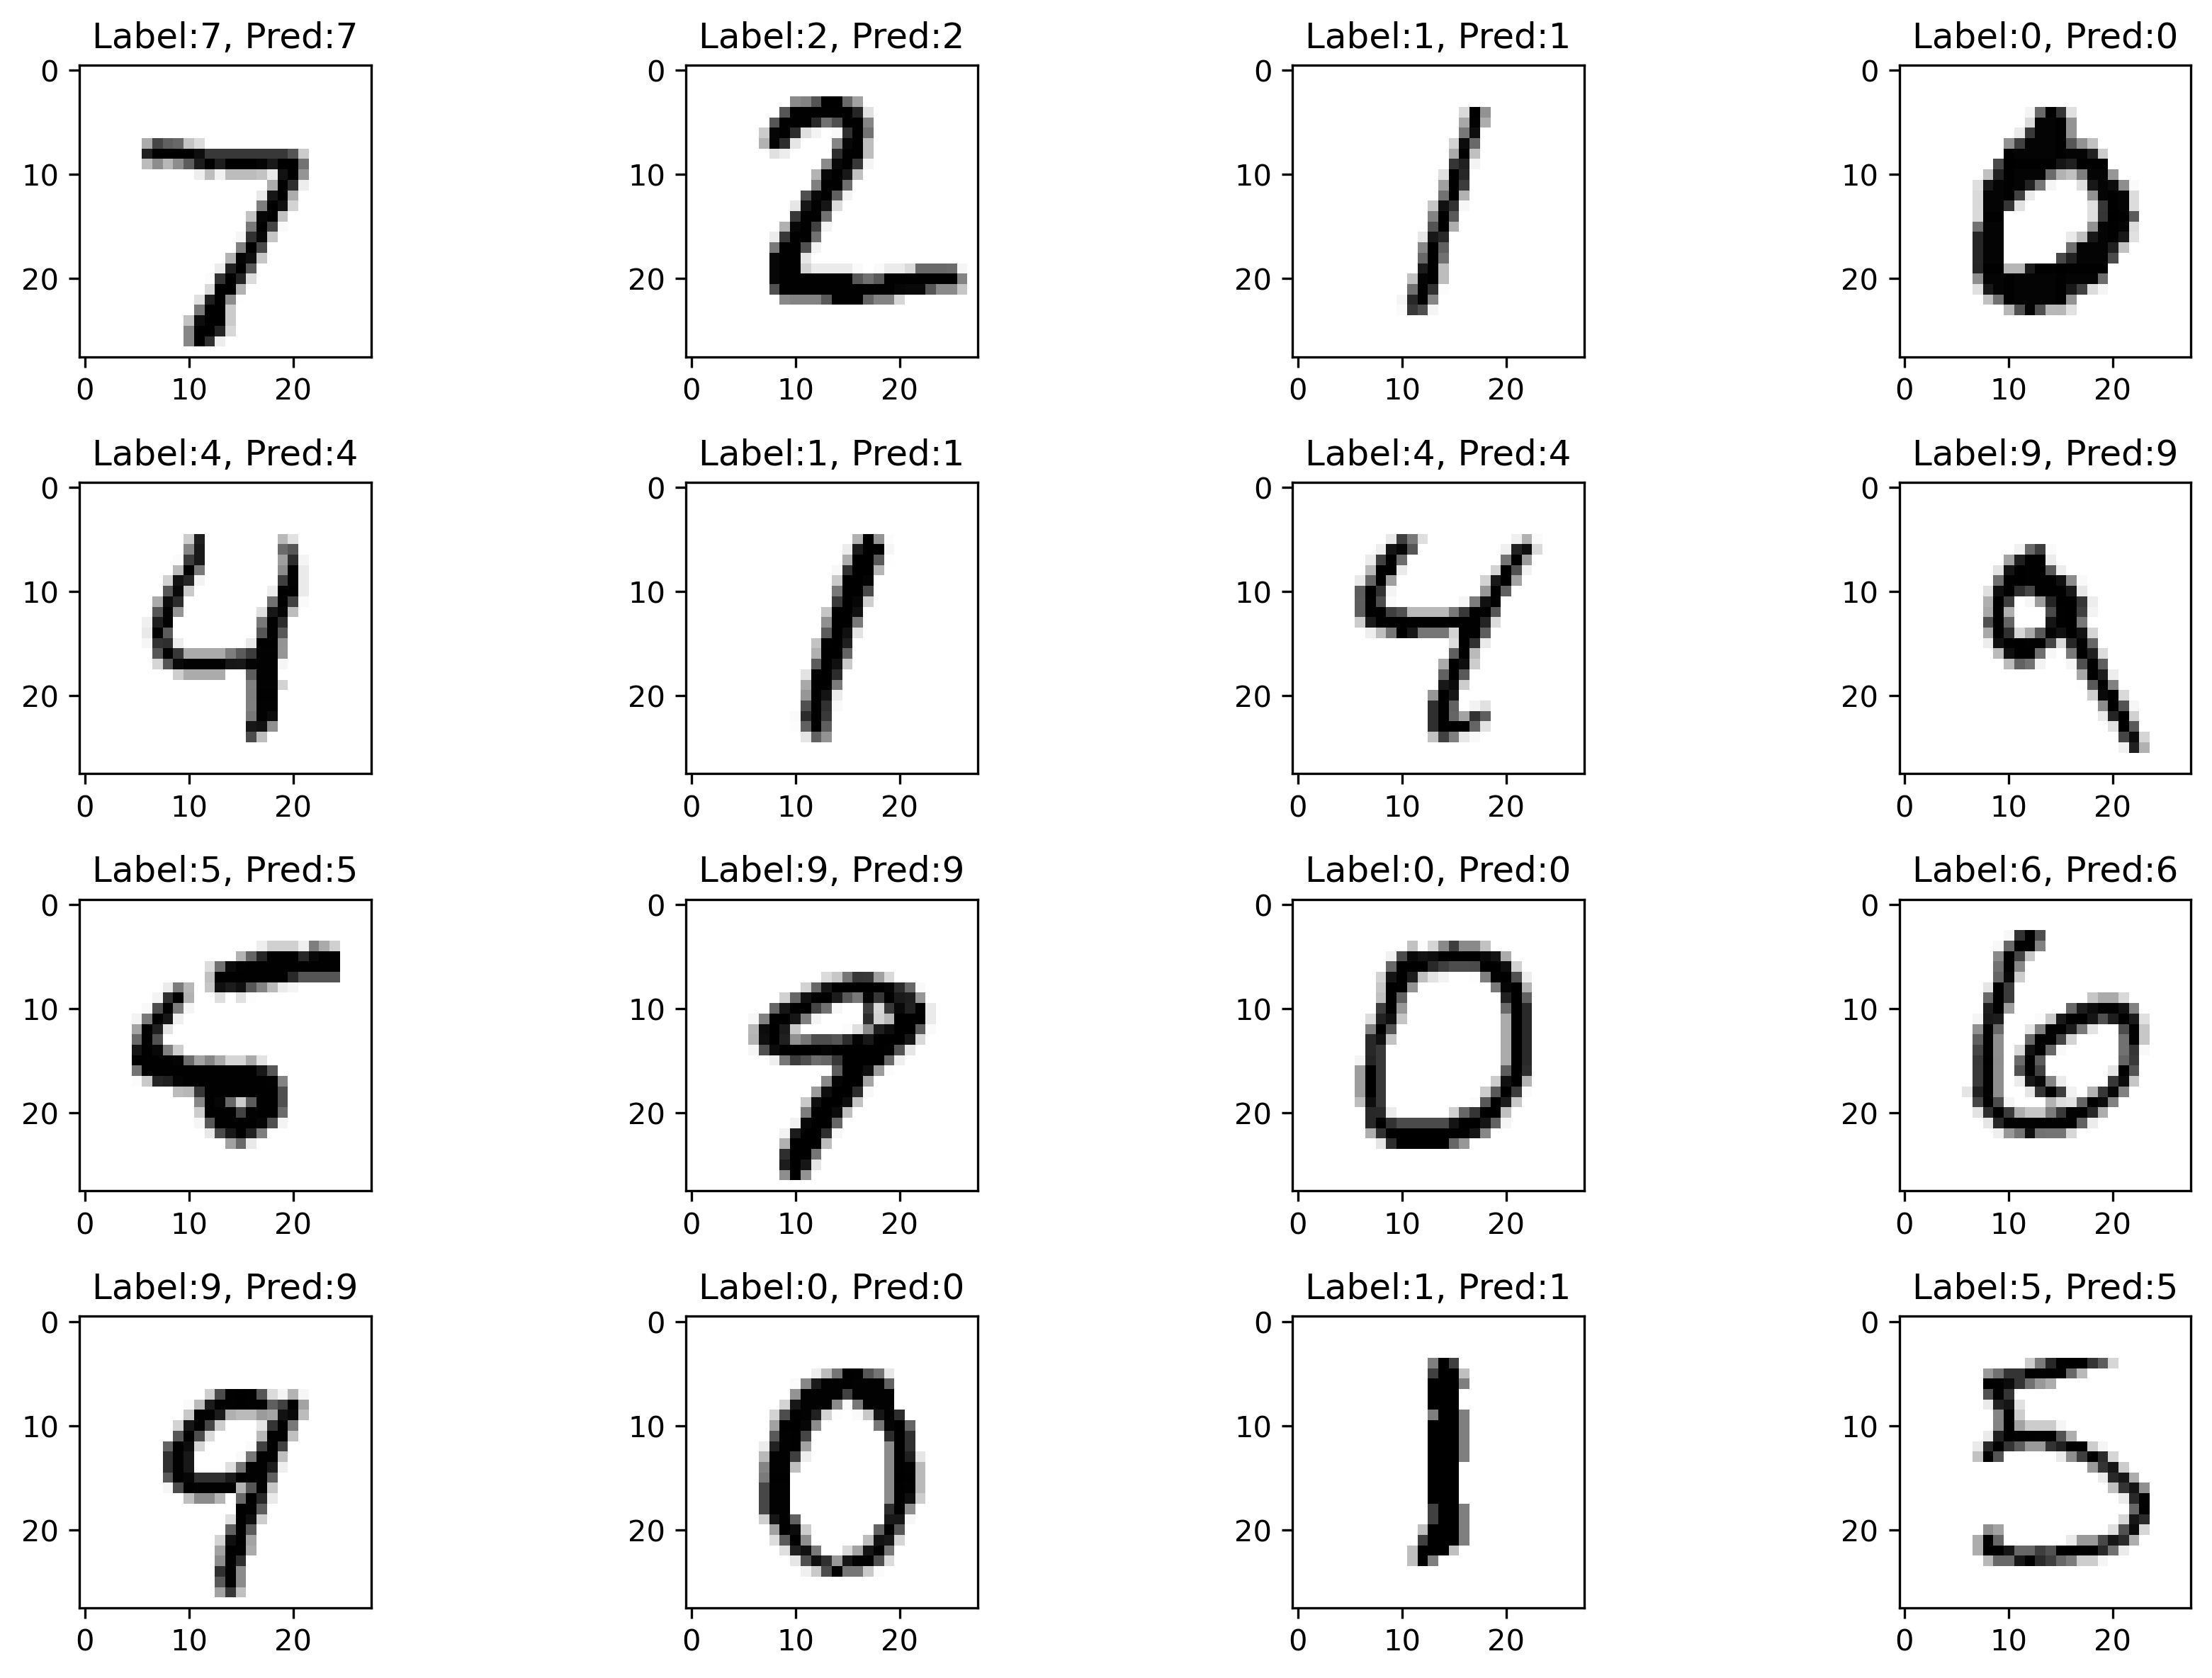

In [3]:
# CNN 모델 결과 출력

# 모델 적합 (반복횟수 5)
model_fit = model.fit(x_train, y_train, batch_size=38, epochs=5, verbose=1
                      , validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

# 모델 정확도 출력
print('Test accuracy:', score[1])

# 샘플 결과 확인
pred_test = model.predict(x_test)
pred_test_y = np.argmax(pred_test, axis=1)
test_y = np.argmax(y_test, axis=1)

count = 0

plt.figure(figsize=(12,8))
for n in range(16):
    count += 1
    plt.subplot(4, 4, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='binary', interpolation='nearest')
    sample_result = "Label:" + str(test_y[n]) + ", Pred:" + str(pred_test_y[n])
    plt.title(sample_result)
plt.tight_layout()

plt.show()

In [ ]:
############ RNN과 LSTM ############

In [4]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/medharawat/google-stock-price
df_train = pd.read_csv("datasets/Google_Stock_Price_Train.csv")
df_test = pd.read_csv("datasets/Google_Stock_Price_Test.csv")
# 데이터 샘플 확인
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
# 데이터 정규화 및 numpy 배열 변환

df_train_array = df_train.iloc[:, 1:2].values
scaler = MinMaxScaler(feature_range = (0,1))
df_train_array_scaled = scaler.fit_transform(df_train_array)

x_train = []
y_train = []
for i in range(60, 1258):
# 독립변수와 종속변수 생성 - 60일 시간차
    x_train.append(df_train_array_scaled[i-60:i, 0])
    y_train.append(df_train_array_scaled[i, 0])
    
# numpy 배열로 변환
x_train, y_train = np.array(x_train), np.array(y_train)

# 새로운 차원 추가
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(1198, 60, 1)


In [6]:
# RNN 모델에 LSTM 레이어 추가하여 모델 생성 및 학습

# 모델 설정
RL_model = Sequential()
epochs = 100
batch_size = 28

# 첫 번째 LSTM 레이어 및 일부 Dropout 정규화 추가
RL_model.add(LSTM( units = 50, 
                  return_sequences = True, input_shape = (x_train.shape[1], 1) ))
# Ignore 20% of the neurons
RL_model.add(Dropout(0.2))

# 두 번째 LSTM 레이어 및 일부 Dropout 정규화 추가
RL_model.add(LSTM(units = 50, return_sequences = True))
RL_model.add(Dropout(0.2))

# 세 번째 LSTM 레이어 및 일부 Dropout 정규화 추가
RL_model.add(LSTM(units = 50, return_sequences = True))
RL_model.add(Dropout(0.2))

# 네 번째 LSTM 레이어 및 일부 Dropout 정규화 추가
RL_model.add(LSTM(units = 50))
RL_model.add(Dropout(0.2))

# 출력 레이어 추가
RL_model.add(Dense(units = 1))

# RNN 컴파일
RL_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# 학습셋에 RNN(LSTM) 모델 적용
RL_model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/100
43/43 [==============================] - 8s 56ms/step - loss: 0.0376
Epoch 2/100
43/43 [==============================] - 2s 53ms/step - loss: 0.0060
Epoch 3/100
43/43 [==============================] - 2s 53ms/step - loss: 0.0058
Epoch 4/100
43/43 [==============================] - 2s 53ms/step - loss: 0.0046
Epoch 5/100
43/43 [==============================] - 2s 53ms/step - loss: 0.0049
Epoch 6/100
43/43 [==============================] - 2s 53ms/step - loss: 0.0048
Epoch 7/100
43/43 [==============================] - 2s 53ms/step - loss: 0.0052
Epoch 8/100
43/43 [==============================] - 2s 54ms/step - loss: 0.0051
Epoch 9/100
43/43 [==============================] - 2s 53ms/step - loss: 0.0049
Epoch 10/100
43/43 [==============================] - 2s 52ms/step - loss: 0.0053
Epoch 11/100
43/43 [==============================] - 2s 53ms/step - loss: 0.0042
Epoch 12/100
43/43 [==============================] - 2s 52ms/step - loss: 0.0040
Epoch 13/100
43/43 [=====

1/1 [==============================] - 1s 1s/step


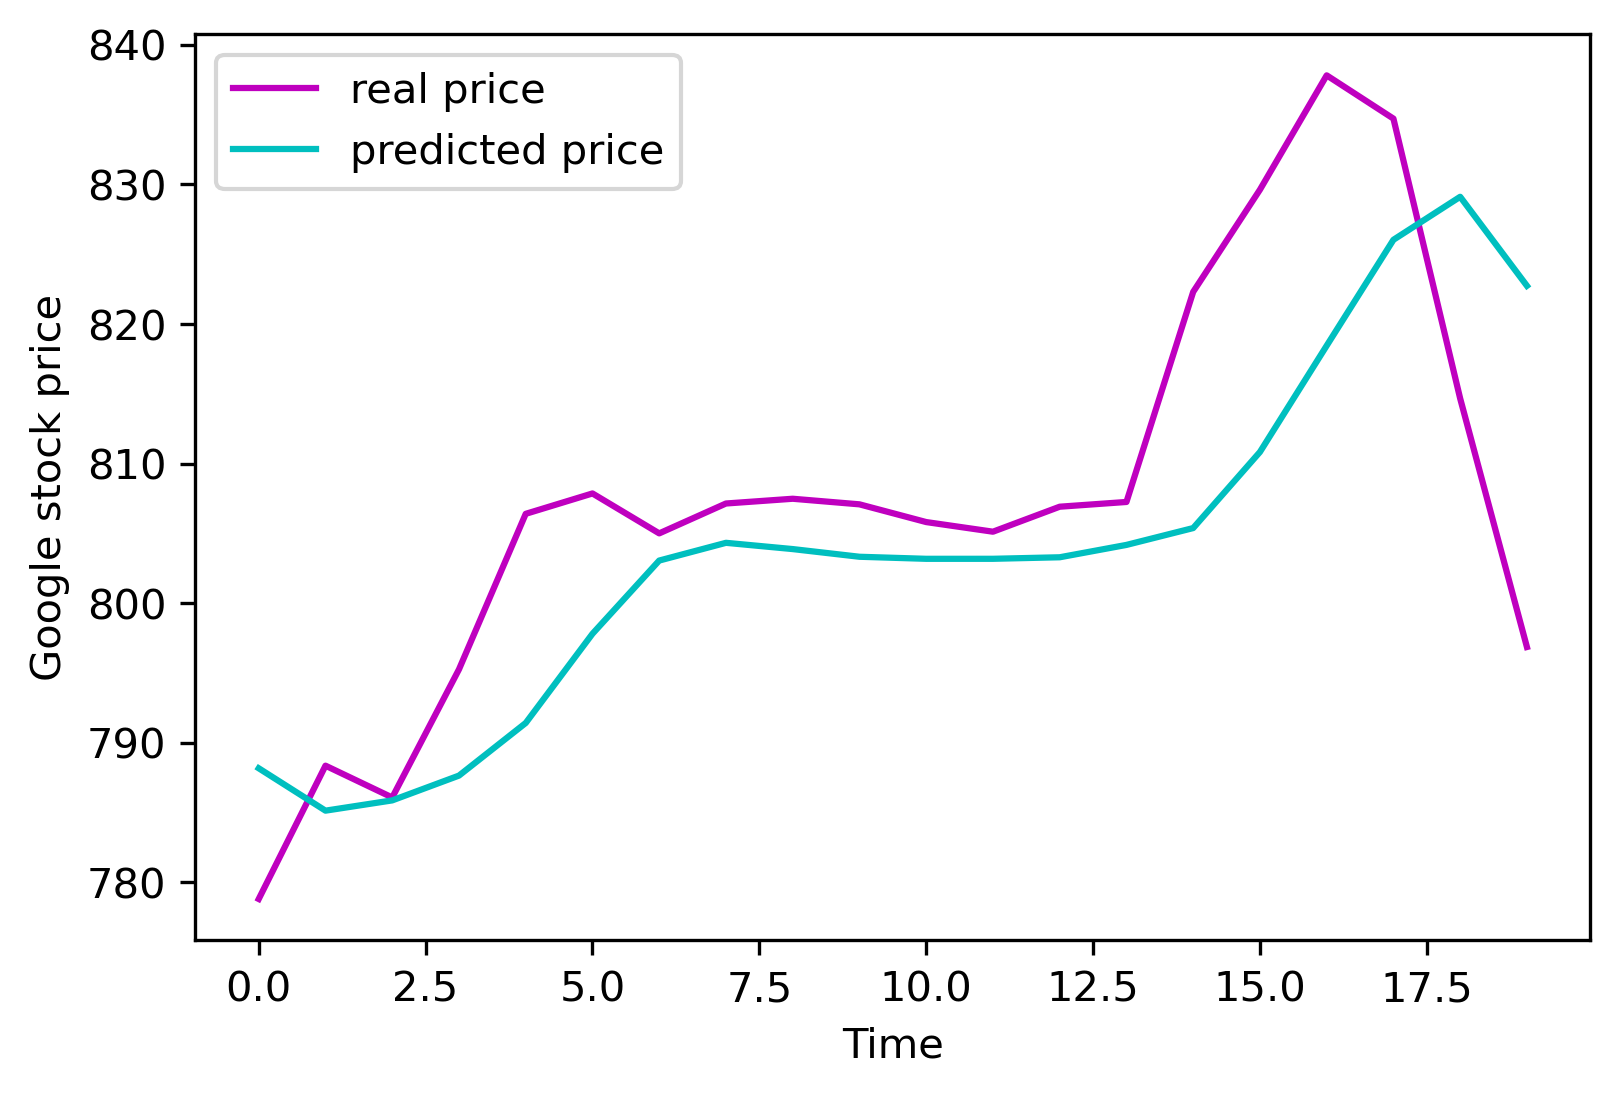

In [7]:
# 예측 및 결과 시각화

df_test_array = df_test.iloc[:, 1:2].values
# 학습셋과 테스트셋 결합
dataset_total = pd.concat( (df_train['Open'], df_test['Open']), axis = 0 )

# 마지막 60일 기간 분리
y_test = dataset_total[len(dataset_total) - len(df_test) - 60:].values

# 데이터를 하나의 열로 가공
y_test = y_test.reshape(-1, 1)

# 테스트셋 정규화 적용
y_test = scaler.transform(y_test)

# 60일 데이터 구조 생성
x_test = []
for i in range(60, 80):
    x_test.append(y_test[i-60:i, 0])
x_test = np.array(x_test)
# 새로운 차원 추가
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# 예측값 산출
predicted_stock_price = RL_model.predict(x_test)

# 정규화된 값을 기존 값으로 재 변환
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# 결과값 시각화
plt.plot(df_test_array, color = 'm', label = 'real price')
plt.plot(predicted_stock_price, color = 'c', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()